In [18]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [19]:
# Reading the exchange_rate dataset

df = pd.read_csv('exchange_rate.csv',index_col=0,parse_dates=True)  # loading dataset and setting date column as index.
df.head(20)

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849
06-01-1990 00:00,0.7866
07-01-1990 00:00,0.7886
08-01-1990 00:00,0.7910
09-01-1990 00:00,0.7939


In [20]:
# checking for null values
df.isnull().sum()

,0
Ex_rate,0


In [21]:
df.duplicated().sum() # checking for duplicated values

2258

In [22]:
df.dtypes  # checking data types

,0
Ex_rate,float64


In [23]:
df.describe() # checking basic statistics.

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [24]:
df.columns  # checking column name

Index(['Ex_rate'], dtype='object')

In [25]:
df.index  # displaying index values.

Index(['01-01-1990 00:00', '02-01-1990 00:00', '03-01-1990 00:00',
       '04-01-1990 00:00', '05-01-1990 00:00', '06-01-1990 00:00',
       '07-01-1990 00:00', '08-01-1990 00:00', '09-01-1990 00:00',
       '10-01-1990 00:00',
       ...
       '01-10-2010 00:00', '02-10-2010 00:00', '03-10-2010 00:00',
       '04-10-2010 00:00', '05-10-2010 00:00', '06-10-2010 00:00',
       '07-10-2010 00:00', '08-10-2010 00:00', '09-10-2010 00:00',
       '10-10-2010 00:00'],
      dtype='object', name='date', length=7588)

In [26]:
sea = seasonal_decompose(df['Ex_rate'], model = 'multiplicative', period = 365)

<Axes: xlabel='date'>

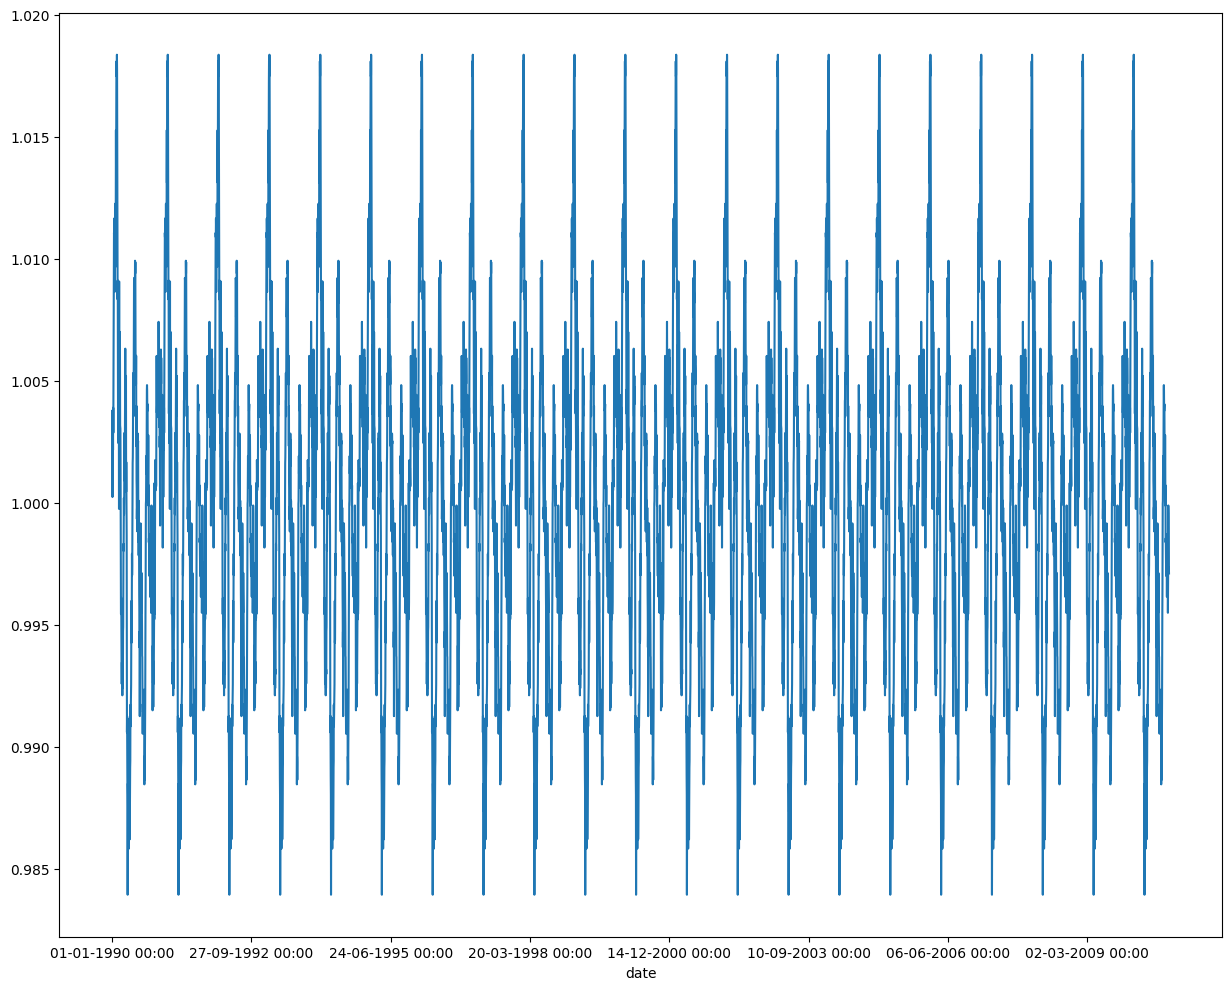

In [27]:
sea.seasonal.plot(figsize = (15,12))  # plotting

<Axes: xlabel='date'>

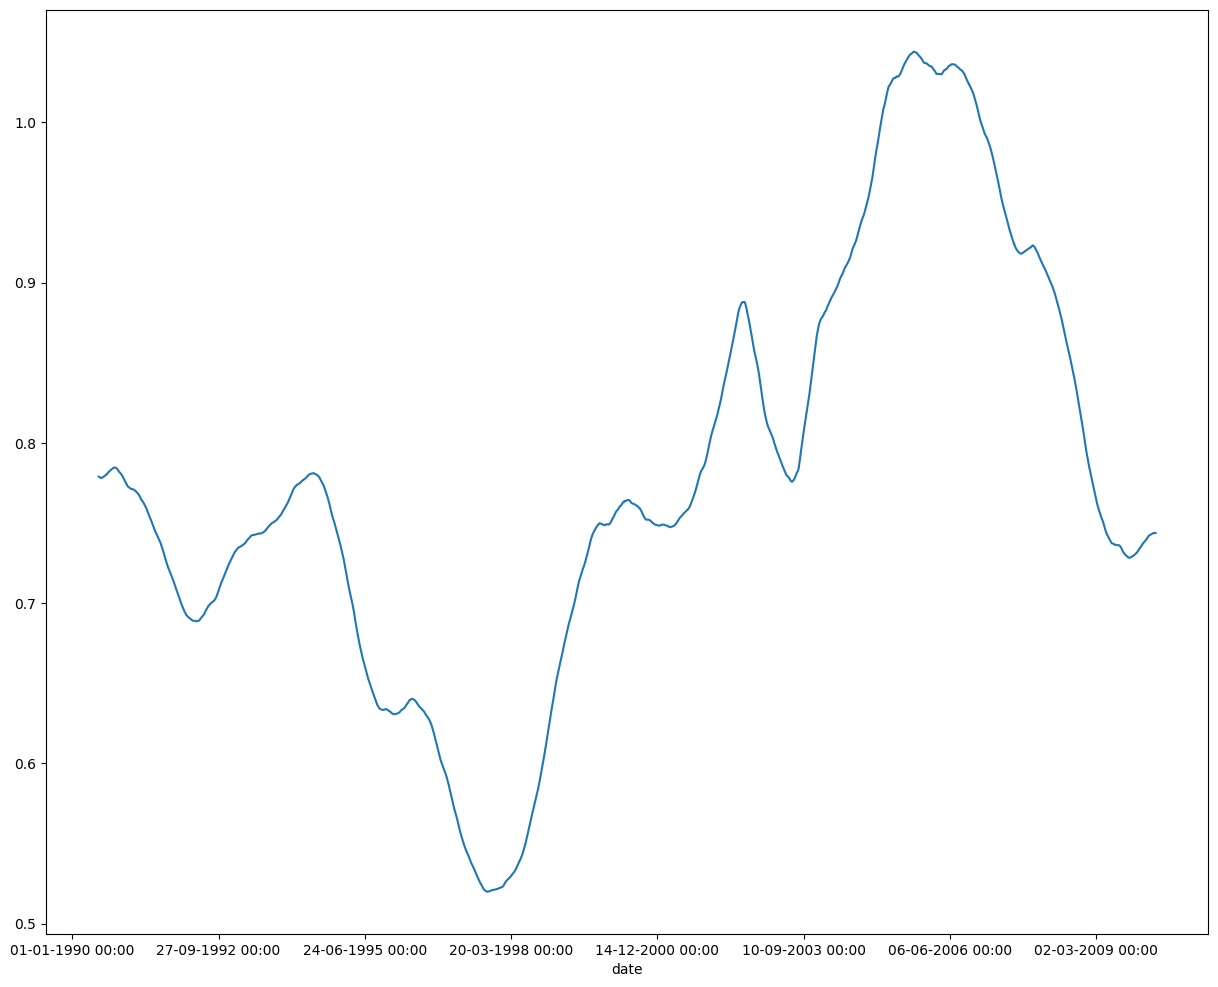

In [28]:
sea.trend.plot(figsize = (15, 12))  # showing trend

<Axes: xlabel='date'>

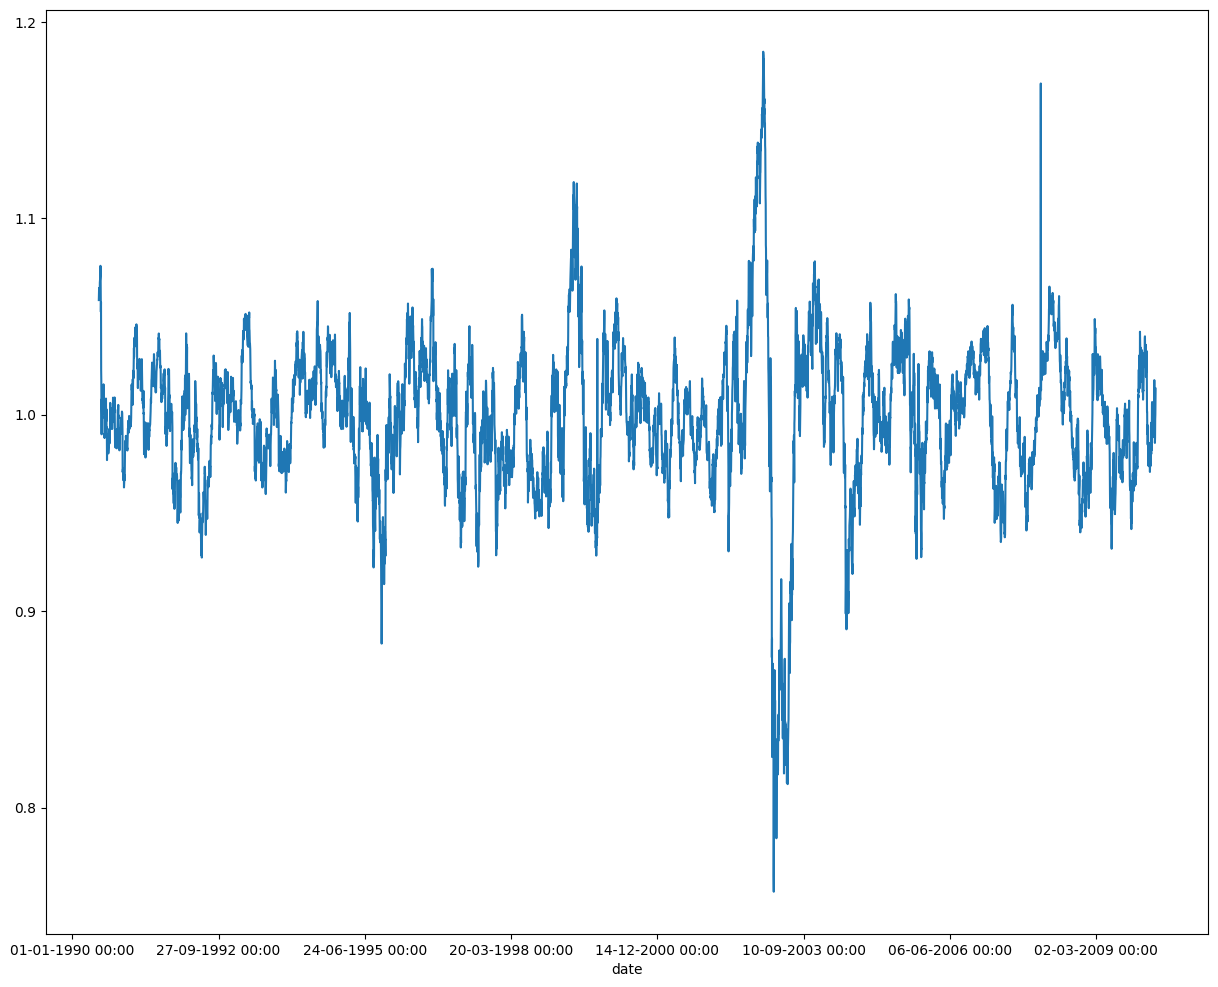

In [29]:
sea.resid.plot(figsize = (15, 12))

In [30]:
ts_data = df['Ex_rate']

In [31]:
ts_data_log = np.log(ts_data)  # applying log transformation

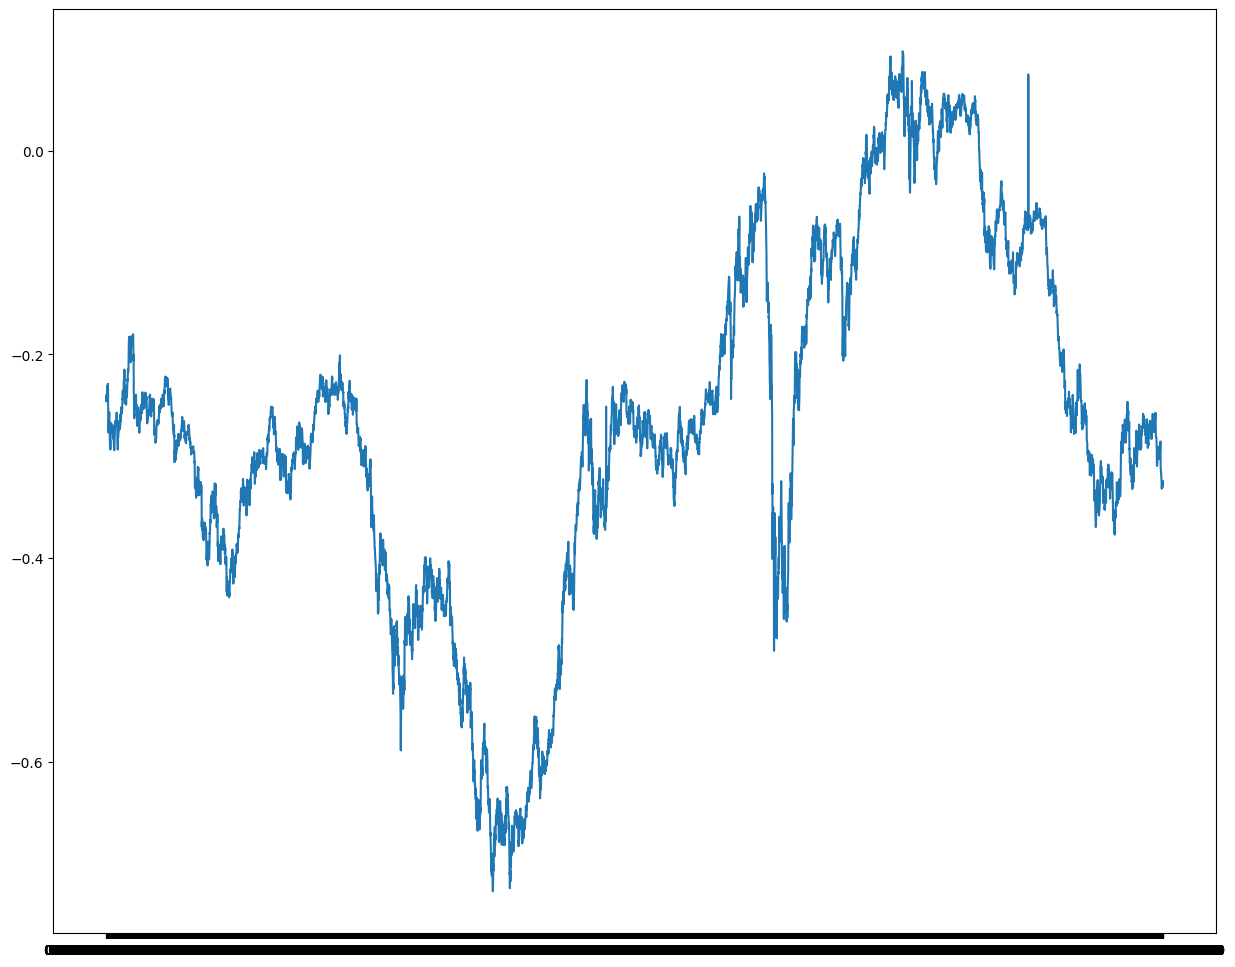

In [32]:
plt.figure(figsize = (15, 12))  # visualizing transformed data.
plt.plot(ts_data_log)

In [33]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')


    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


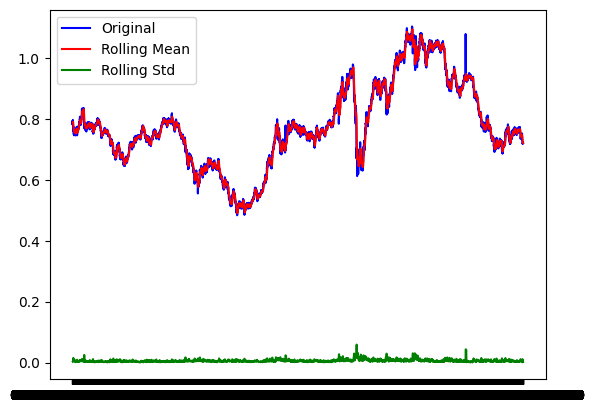

In [34]:
test_stationarity(df['Ex_rate'])  # results of dickey fuller test.
# we got p value greater than 0.05.

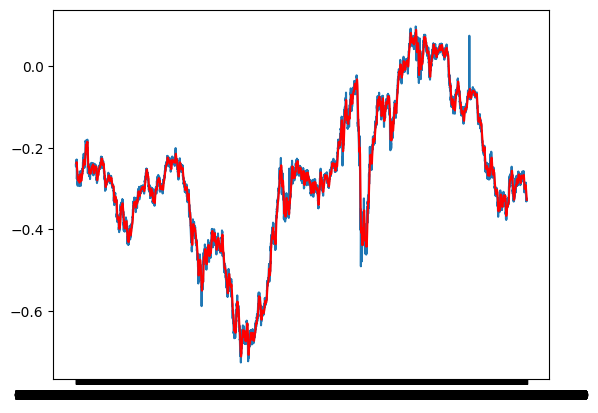

In [35]:
movingAverage = ts_data_log.rolling(window = 12).mean()  # calculating moving average.
movingSTD = ts_data_log.rolling(window = 12).std()
plt.plot(ts_data_log)
plt.plot(movingAverage,color='red')

In [36]:
ts_data_log_diff = ts_data_log - movingAverage  # caluculating difference.
ts_data_log_diff.head(15)

,Ex_rate
date,
01-01-1990 00:00,NaN
02-01-1990 00:00,NaN
03-01-1990 00:00,NaN
04-01-1990 00:00,NaN
05-01-1990 00:00,NaN
06-01-1990 00:00,NaN
07-01-1990 00:00,NaN
08-01-1990 00:00,NaN
09-01-1990 00:00,NaN


In [37]:
ts_data_log_diff.dropna(inplace=True)  #dropping null values
ts_data_log_diff.shape

(7577,)

Results of Dickey-Fuller Test :

Test Statistic                -1.404275e+01
p-value                        3.281274e-26
#Lags Used                     2.900000e+01
Number of Observations Used    7.547000e+03
Critical Value (1%)           -3.431217e+00
Critical Value (5%)           -2.861923e+00
Critical Value (10%)          -2.566974e+00
dtype: float64


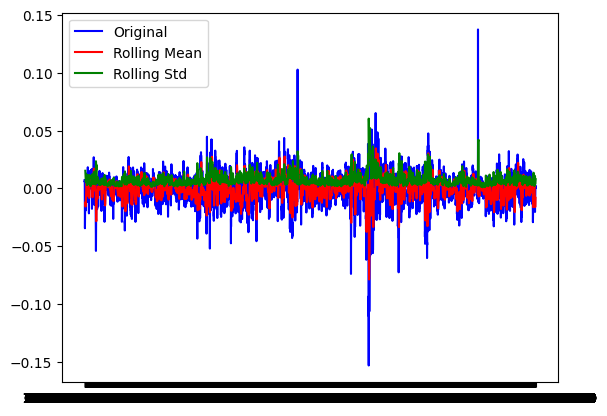

In [38]:
test_stationarity(ts_data_log_diff)  #passing difference to our function
# now we got p value less than 0.05

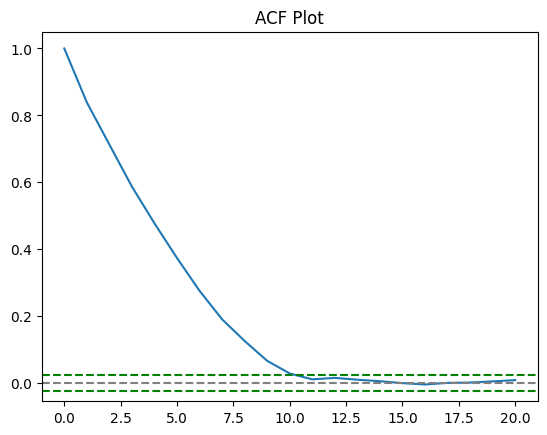

In [39]:
# Plotting the ACF curve

plt.plot(np.arange(0,21), acf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('ACF Plot')
plt.show()

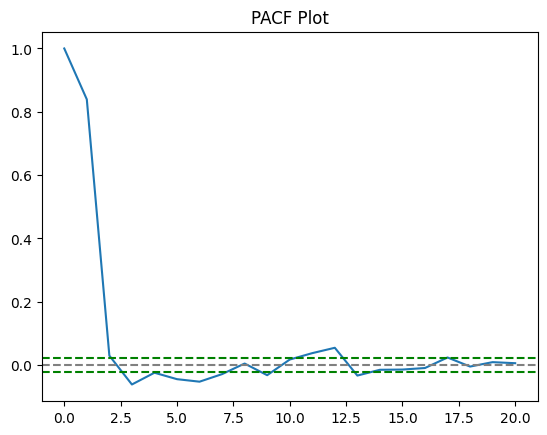

In [40]:
# Plotting the PACF curve

plt.plot(np.arange(0,21), pacf(ts_data_log_diff, nlags = 20))
plt.axhline(y=0, linestyle = '--', color = 'gray')

#Confidence intervals
plt.axhline(y=-1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.axhline(y=1.96/np.sqrt(len(ts_data_log_diff)), linestyle = '--', color = 'green')
plt.title('PACF Plot')
plt.show()

In [41]:
!pip install statsmodels  #install require pacakage

In [42]:
#building model
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['Ex_rate'], order=(1,1,1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [43]:
result=model.fit()  #fitting model

<Axes: xlabel='date'>

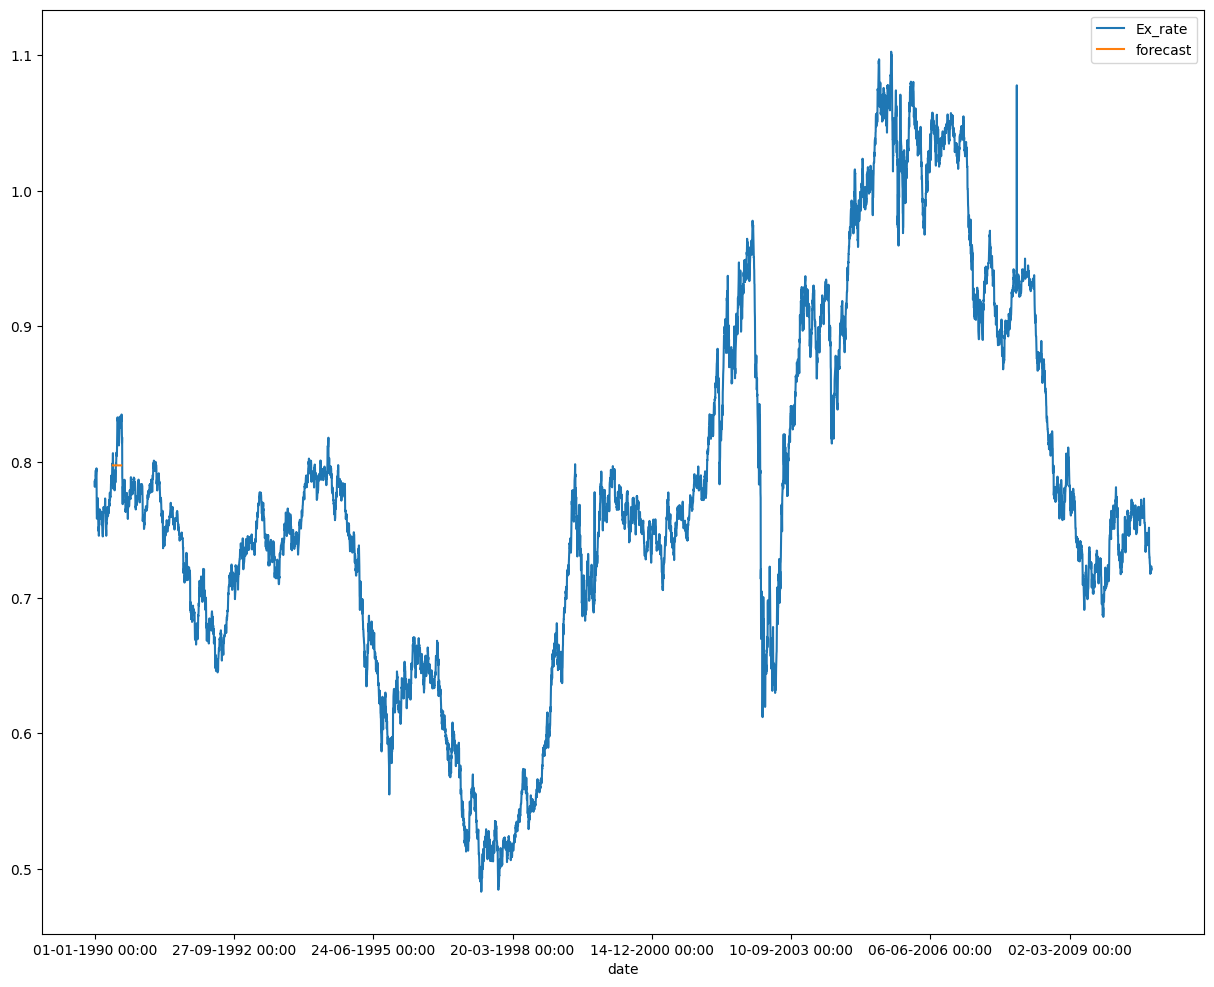

In [44]:
df['forecast']= result.predict(start=130,end=190,dynamic=True)  # plotting result
df[['Ex_rate','forecast']].plot(figsize=(15,12))

In [45]:
result.predict()  # predicting

,predicted_mean
date,
01-01-1990 00:00,0.000000
02-01-1990 00:00,0.785500
03-01-1990 00:00,0.782286
04-01-1990 00:00,0.786058
05-01-1990 00:00,0.786089
...,...
06-10-2010 00:00,0.718837
07-10-2010 00:00,0.718522
08-10-2010 00:00,0.721400


In [46]:
result.forecast(steps=30)  # forecasting values.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
7588,0.720826
7589,0.720826
7590,0.720826
7591,0.720826
7592,0.720826
7593,0.720826
7594,0.720826
7595,0.720826
7596,0.720826
7597,0.720826


In [47]:
result.fittedvalues

,0
date,
01-01-1990 00:00,0.000000
02-01-1990 00:00,0.785500
03-01-1990 00:00,0.782286
04-01-1990 00:00,0.786058
05-01-1990 00:00,0.786089
...,...
06-10-2010 00:00,0.718837
07-10-2010 00:00,0.718522
08-10-2010 00:00,0.721400


In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt

model = SimpleExpSmoothing(df['Ex_rate'])  #building models utilizing holt

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [49]:
fit1 = model.fit() #fitting model
pred1 = fit1.forecast(9)

fit2 = model.fit(smoothing_level=.2)
pred2 = fit2.forecast(9)

fit3 = model.fit(smoothing_level=.5)
pred3 = fit3.forecast(9)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/ba

<Axes: xlabel='date'>

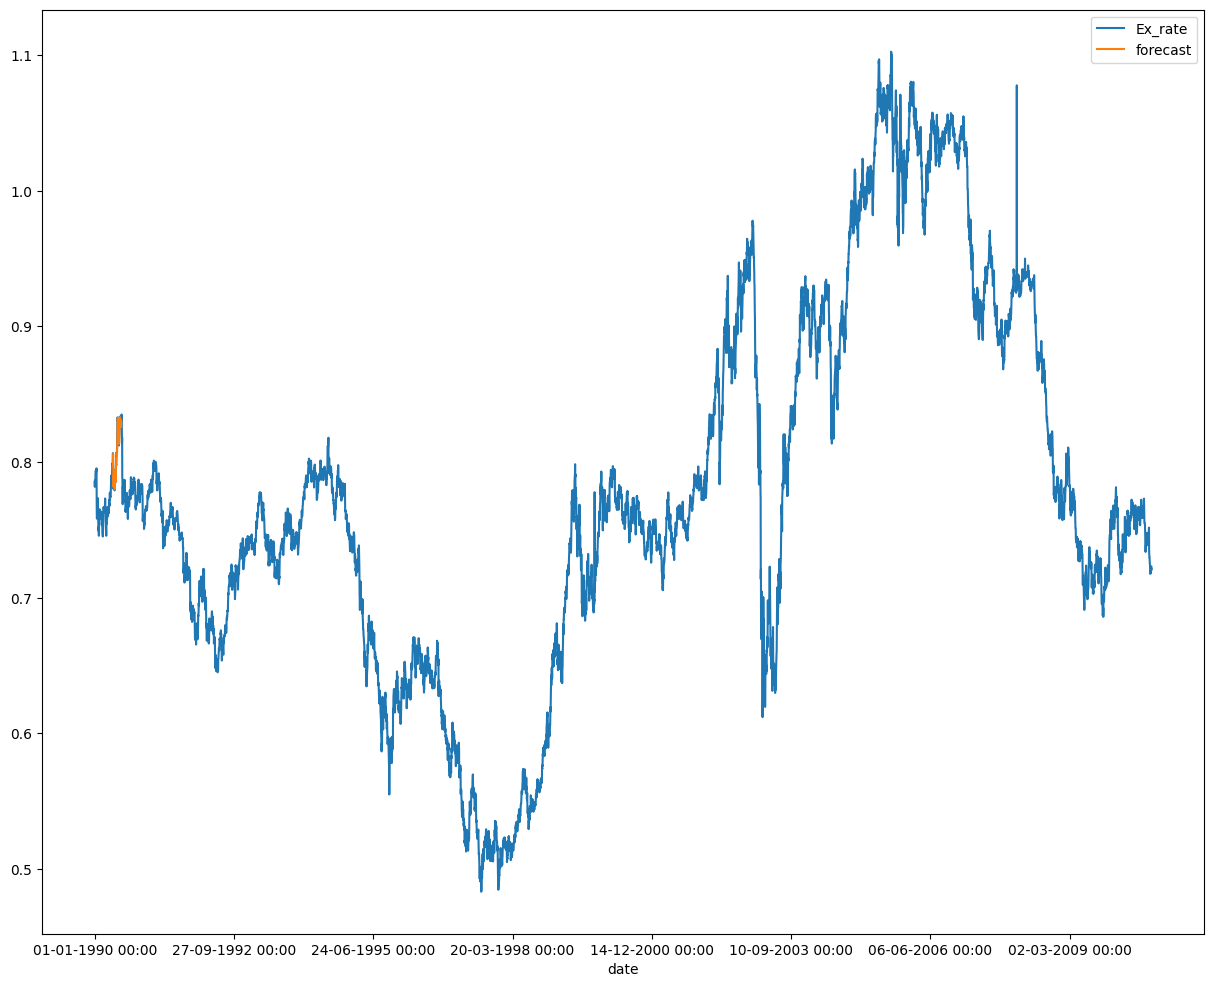

In [50]:
df['forecast'] = fit1.predict(start=130,end=190) #fitting testing size
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: xlabel='date'>

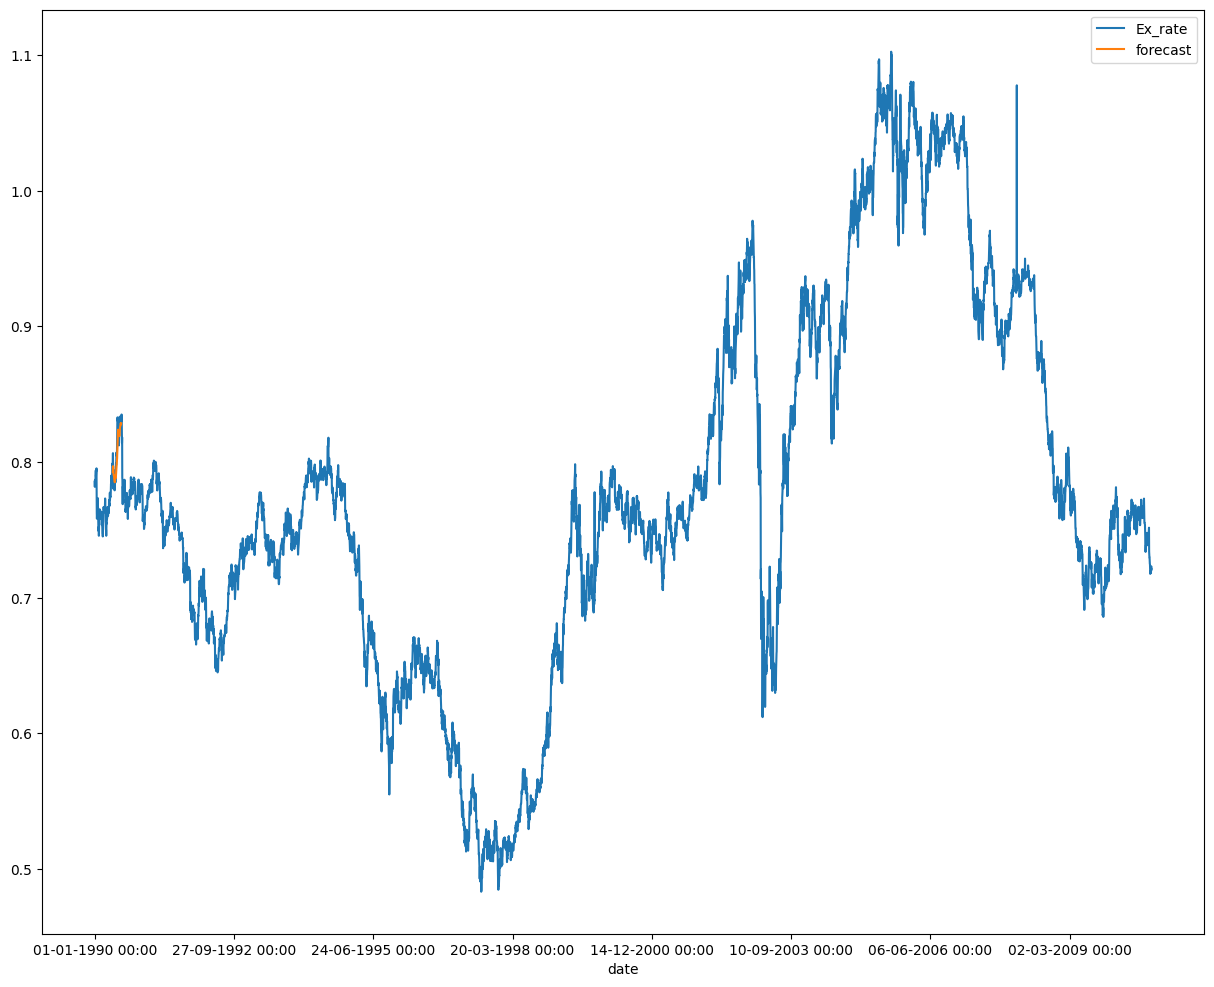

In [51]:
df['forecast'] = fit2.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

<Axes: xlabel='date'>

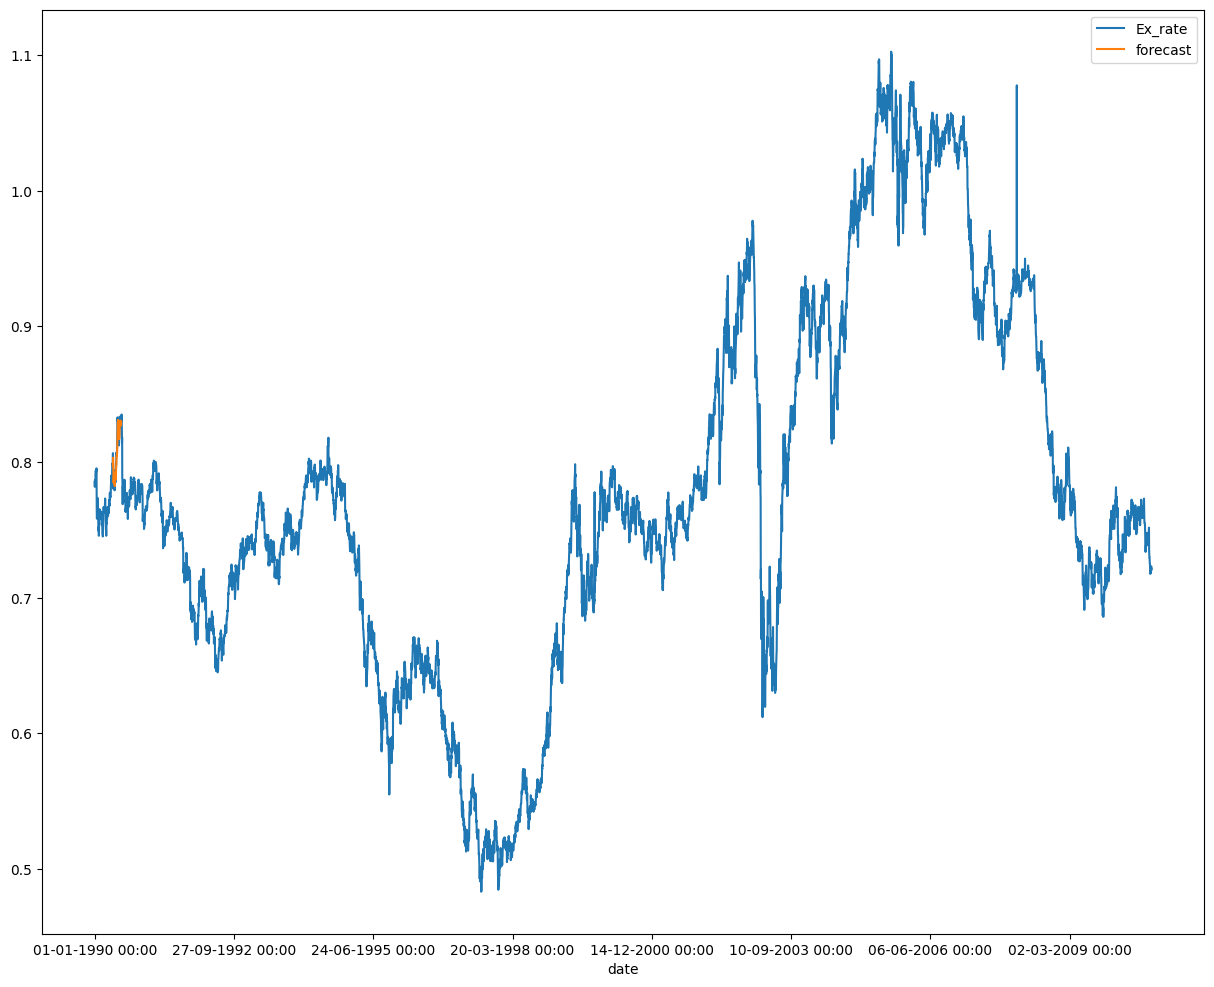

In [52]:
df['forecast'] = fit3.predict(start=130,end=190)
df[['Ex_rate','forecast']].plot(figsize=(15,12))

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
# Handle NaN values before calculating the error
df.dropna(subset=['Ex_rate', 'forecast'], inplace=True)  # Removing rows with Null values in 'Ex_rate' or 'forecast'

print(np.sqrt(mean_squared_error(df['Ex_rate'],df['forecast'])))

0.006000855930537387


In [55]:
# THANK YOU !!!